# Set up

In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Voting Classifiers

In [2]:
heads_proba = 0.51
np.random.seed(42)
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads = coin_tosses.cumsum(axis=0)
cumulative_heads_ratio = cumulative_heads / np.arange(1, 10001).reshape(-1, 1)

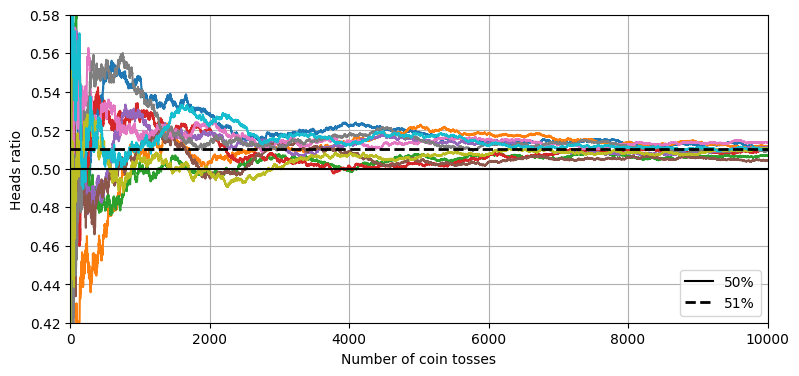

In [3]:
plt.figure(figsize=(9, 4))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.axis([0, 10000, 0.42, 0.58])
plt.legend(loc="lower right")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.grid()
plt.show()

Here, we will build  a voting classifier.

In [4]:
from sklearn.datasets import make_moons
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ("lr", LogisticRegression(random_state=42)),
        ("rf", RandomForestClassifier(random_state=42)),
        ("svc", SVC(random_state=42)),
    ]
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

When you train `VotingClassifier`, it clones every estimators and fits the clones. The original estimators can be accessed via the `estimators` attribute, while the fitted estimators can be accessed via the `estimators_` attribute.

In [8]:
voting_clf.estimators

[('lr', LogisticRegression(random_state=42)),
 ('rf', RandomForestClassifier(random_state=42)),
 ('svc', SVC(random_state=42))]

In [5]:
voting_clf.estimators_

[LogisticRegression(random_state=42),
 RandomForestClassifier(random_state=42),
 SVC(random_state=42)]

If you prefer a dict instead of a list, you can use the attribute `named_estimators_` instead.

In [6]:
voting_clf.named_estimators_

{'lr': LogisticRegression(random_state=42),
 'rf': RandomForestClassifier(random_state=42),
 'svc': SVC(random_state=42)}

In [7]:
for name, classifier in voting_clf.named_estimators_.items():
    print(name, "=", classifier.score(X_test, y_test))

lr = 0.864
rf = 0.896
svc = 0.896


When you call the voting classifier's method `predict`, it performs the hard voting. 

In [9]:
voting_clf.predict(X_test[:1])

array([1])

The voting classifier asks all of its estimators to predict the instance, then check which class gets the most votes.

In [10]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([1]), array([1]), array([0])]

Let's see how it performs on the test set.

In [11]:
voting_clf.score(X_test, y_test)

0.912

And yes, the voting classifier outperform all the individual classifiers

You can use soft voting by setting the `voting` hyperparameter to `soft`. This will tell the model to estimate each individual's probabilities. In our case, the SVC don't estimate the probability by default, so you need to set its `probability=True`.

In [13]:
voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.92